#  load dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn import metrics

warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(7.5,3.8)})
data = pd.read_csv("diabetic_data.csv")

In [2]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.shape

(101766, 50)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# preprocessing dataset

In [5]:
data.replace("?",np.nan,inplace = True)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

In [6]:
data = data.drop('weight',1)
data = data.drop('payer_code', 1)
data = data.drop('medical_specialty',1)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

race             2.233555
diag_3           1.398306
diag_2           0.351787
diag_1           0.020636
encounter_id     0.000000
tolazamide       0.000000
glyburide        0.000000
tolbutamide      0.000000
pioglitazone     0.000000
rosiglitazone    0.000000
dtype: float64

In [7]:
print(data['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [8]:
data['race'] = data['race'].fillna('Caucasian')

In [9]:
data['diag_1'] = data['diag_1'].fillna('Unknown')
data['diag_2'] = data['diag_2'].fillna('Unknown')
data['diag_3'] = data['diag_3'].fillna('Unknown')

In [10]:
data.isna().sum().sort_values(ascending = False).head()

encounter_id     0
tolazamide       0
acetohexamide    0
glipizide        0
glyburide        0
dtype: int64

In [11]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [12]:
obj_col = data.columns[data.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object') 
 total number of categorical columns: 34


In [13]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 13


In [14]:
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')

In [15]:
data = data.drop('encounter_id',1)
data = data.drop('patient_nbr',1)

In [16]:
data.shape

(101766, 45)

# Train test split

In [17]:
data1 = data.copy()

In [18]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(np.array(data1.index),
                                           train_size=0.8,random_state=41,stratify = data['readmitted'])

In [19]:
train = data1.loc[train_index,:]
test = data1.loc[test_index,:]

In [20]:
y_train = train['readmitted']
y_test = test['readmitted']

In [21]:
train.drop('readmitted',axis = 1,inplace = True)
test.drop('readmitted',axis = 1,inplace = True)

In [22]:
train.shape, test.shape

((81412, 44), (20354, 44))

In [23]:
X_train_1 = train.copy()
y_train_1 = y_train.copy()

In [24]:
X_test_1 = test.copy()
y_test_1 = y_test.copy()

# Initial data analysis

<AxesSubplot:xlabel='readmitted', ylabel='count'>

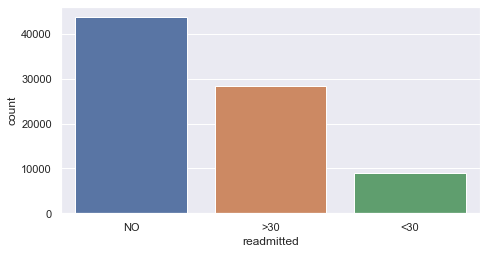

In [25]:
# response
sns.countplot(y_train)

In [26]:
# replace "NO" and "<30" with 0, ">30" with 1
maps={"NO":1,"<30":0,">30":1}
y_train_1 = y_train_1.map(maps)
y_test_1 = y_test_1.map(maps)

[Text(0.5, 1.0, 'after reclassify')]

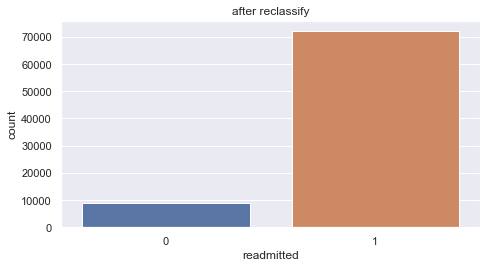

In [27]:
sns.countplot(y_train_1).set(title = 'after reclassify')

In [28]:
y_train_1.value_counts()

1    72327
0     9085
Name: readmitted, dtype: int64

# Explortary data analysis

In [29]:
obj_col = data.columns[data.dtypes==object]
obj_col = obj_col[:-1]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 36


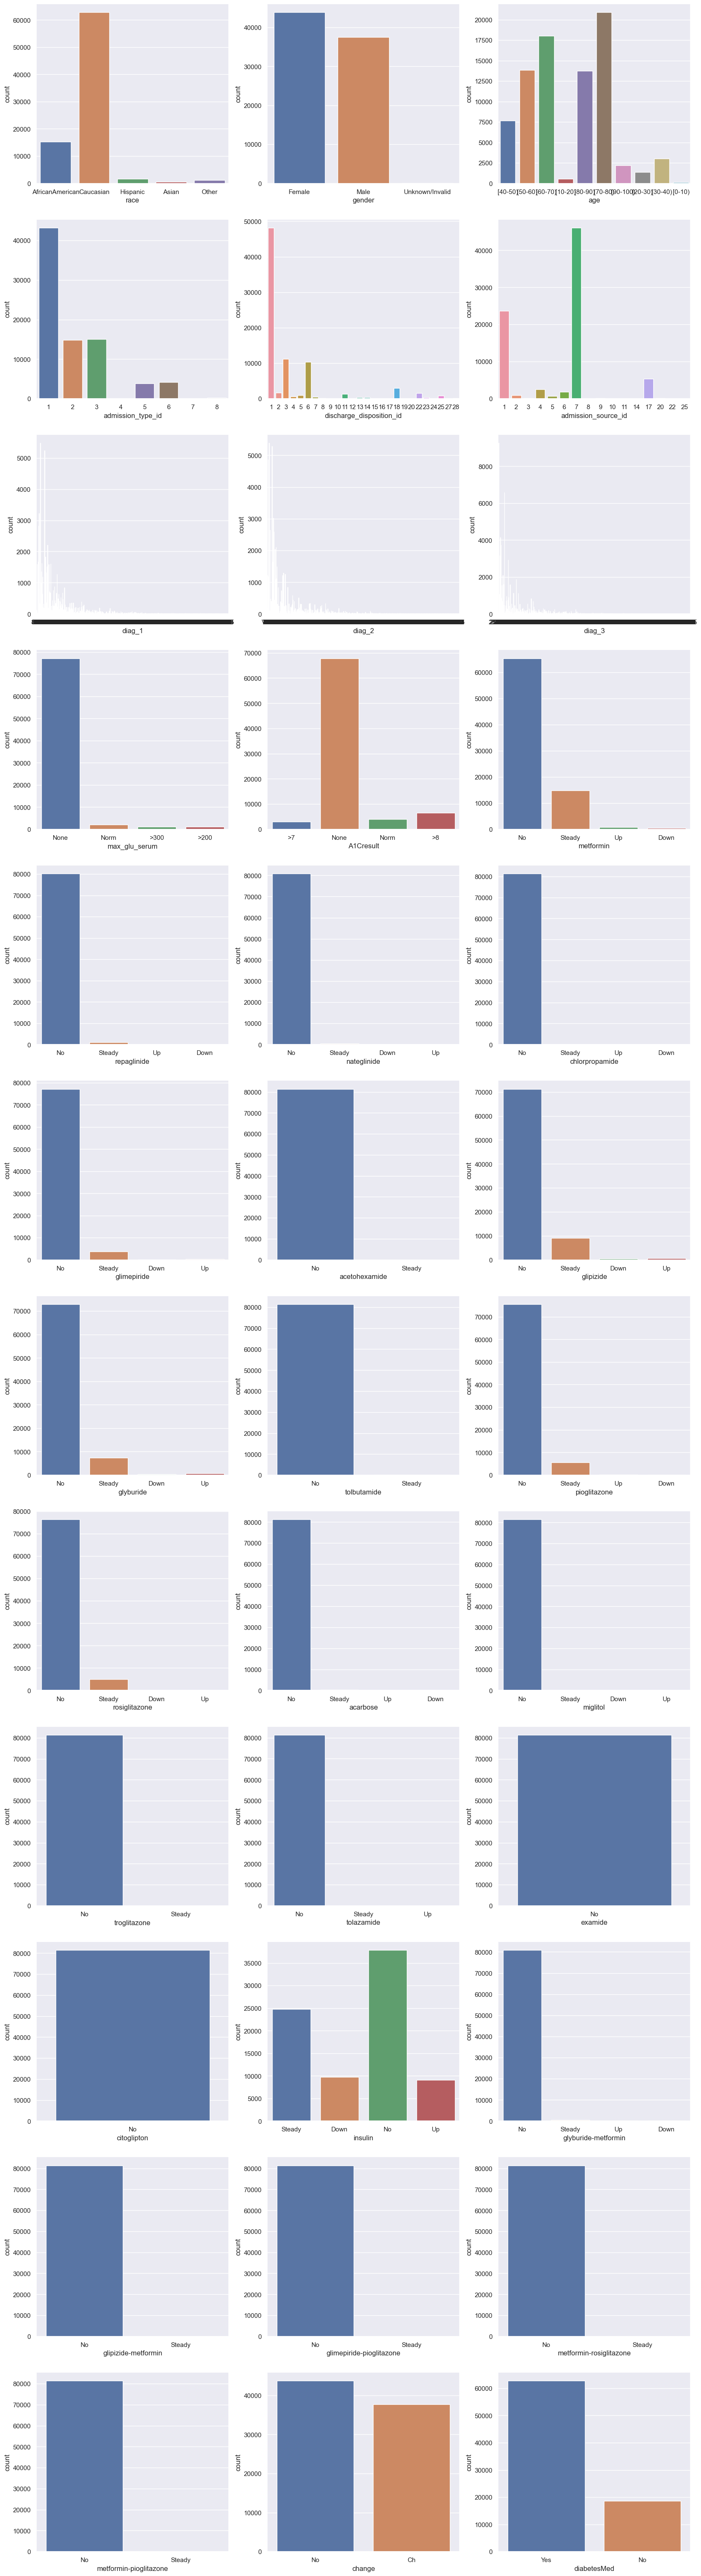

In [30]:
# categorical data - countplot

fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = X_train_1[obj_col[i-1]])

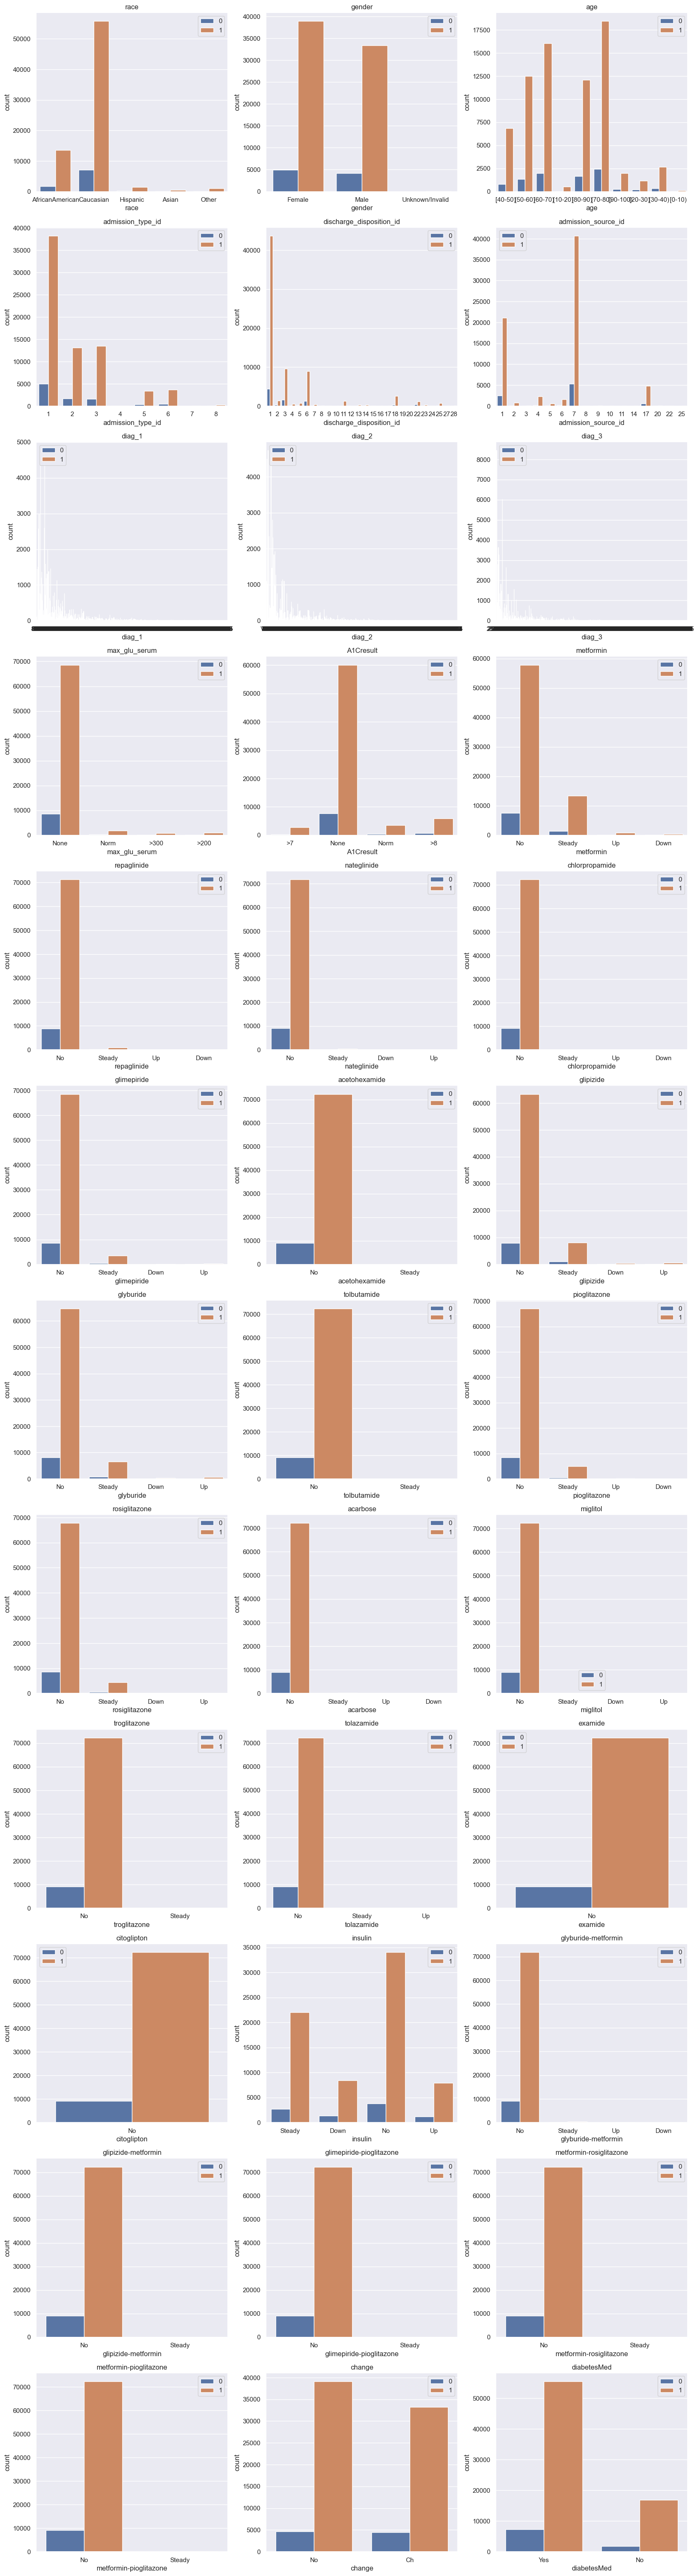

In [31]:
fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = X_train_1[obj_col[i-1]], hue = y_train_1)
    plt.title(obj_col[i-1])
    plt.legend()

In [32]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 8


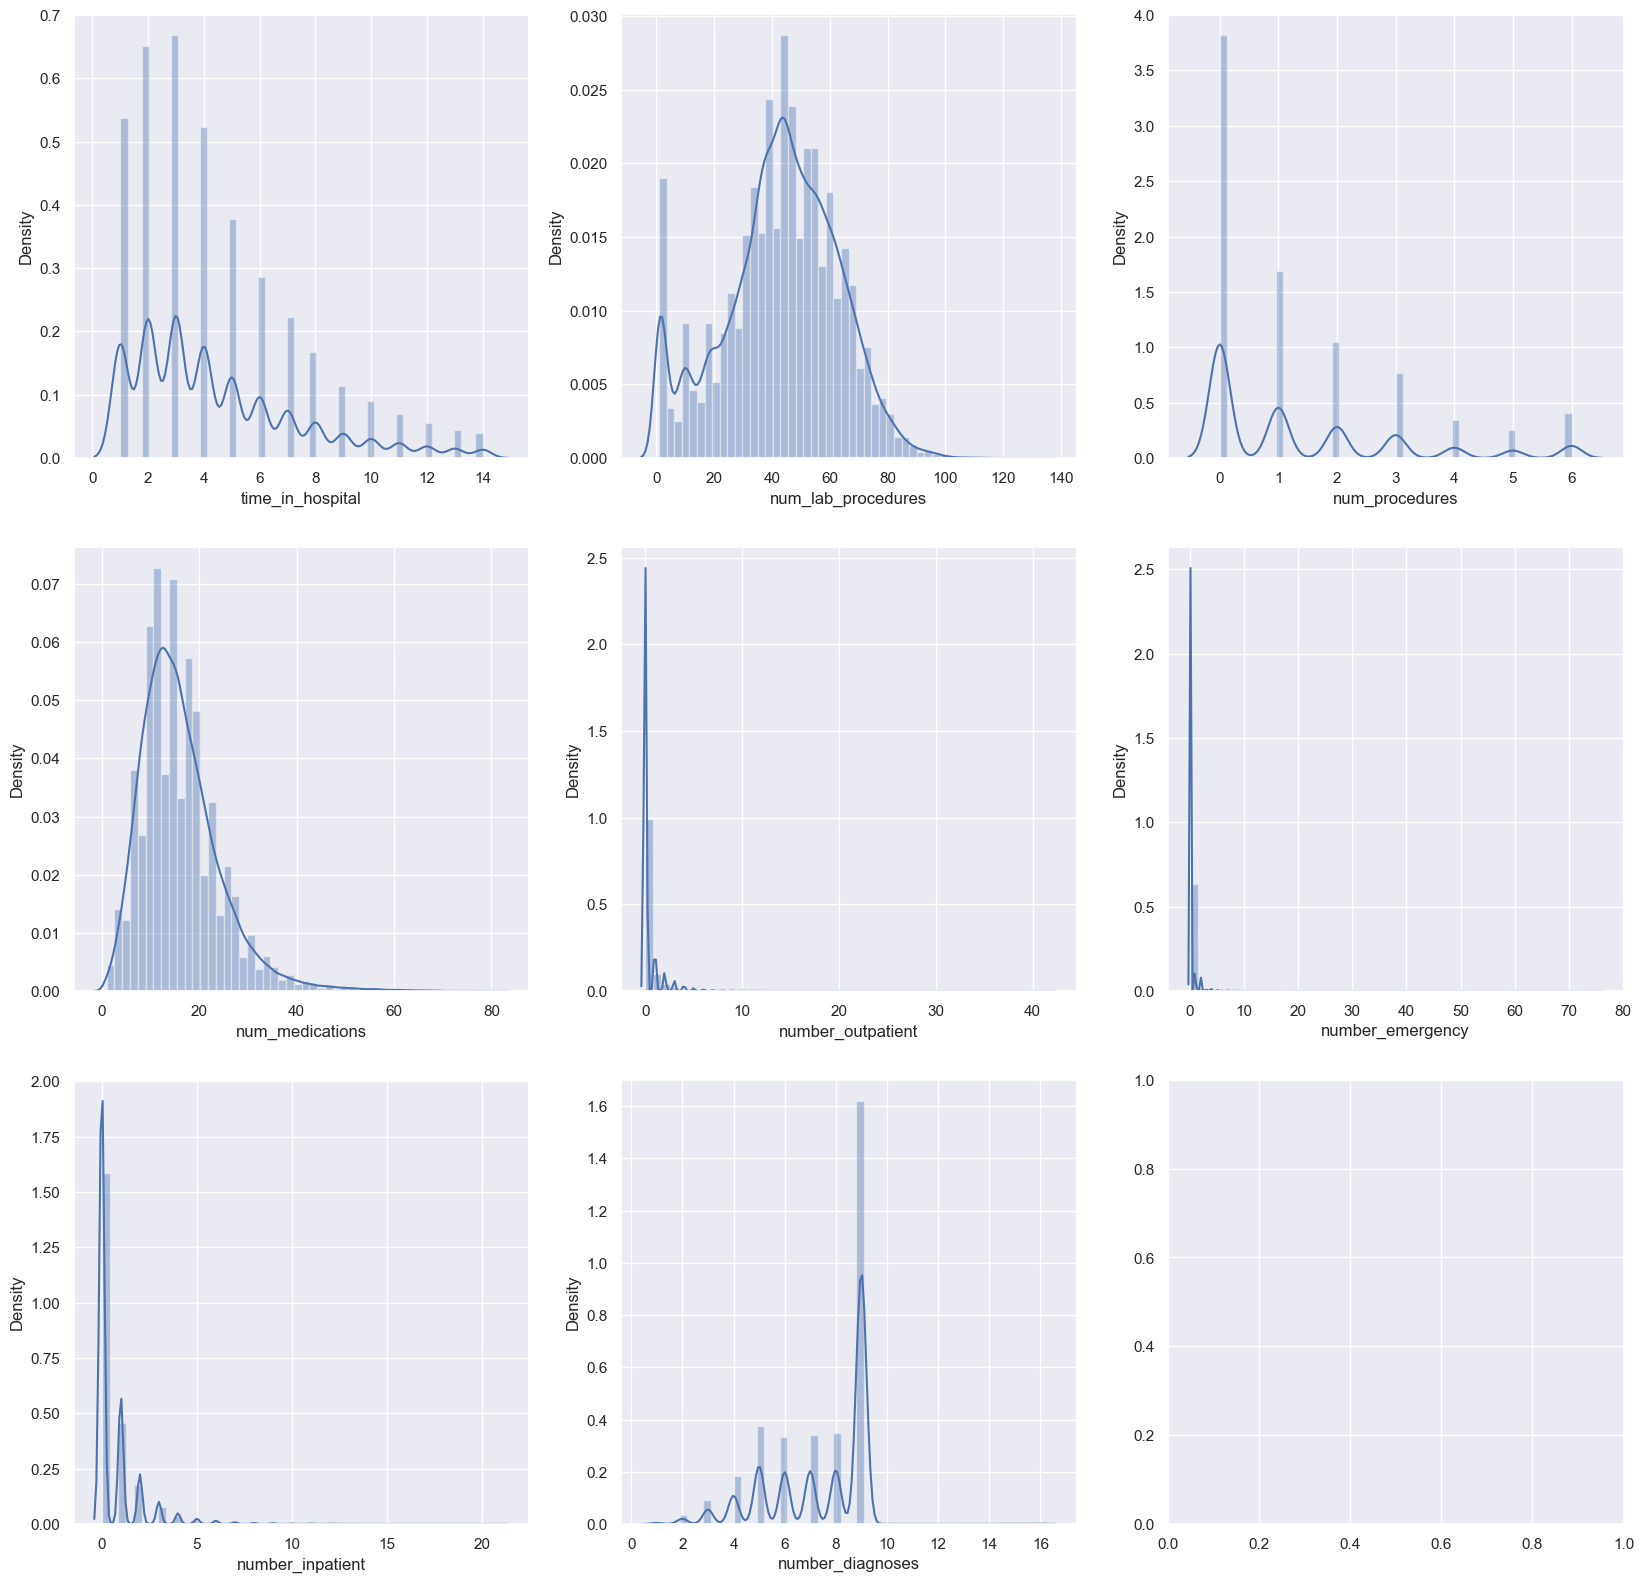

In [33]:
# numerical data - distribution

fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.distplot(X_train_1[num_col[i-1]])

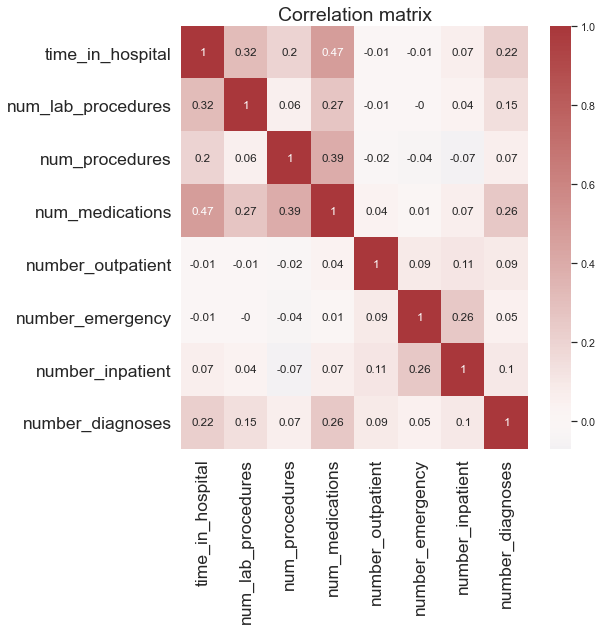

In [34]:
# heat map btw numerical data
plt.figure(figsize=(8,8),dpi = 70)
sns.heatmap(X_train_1[num_col].corr().round(2),
            xticklabels=num_col,
            yticklabels=num_col,
            cmap='vlag',center=0,annot=True)
plt.title('Correlation matrix',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=360)
plt.show()

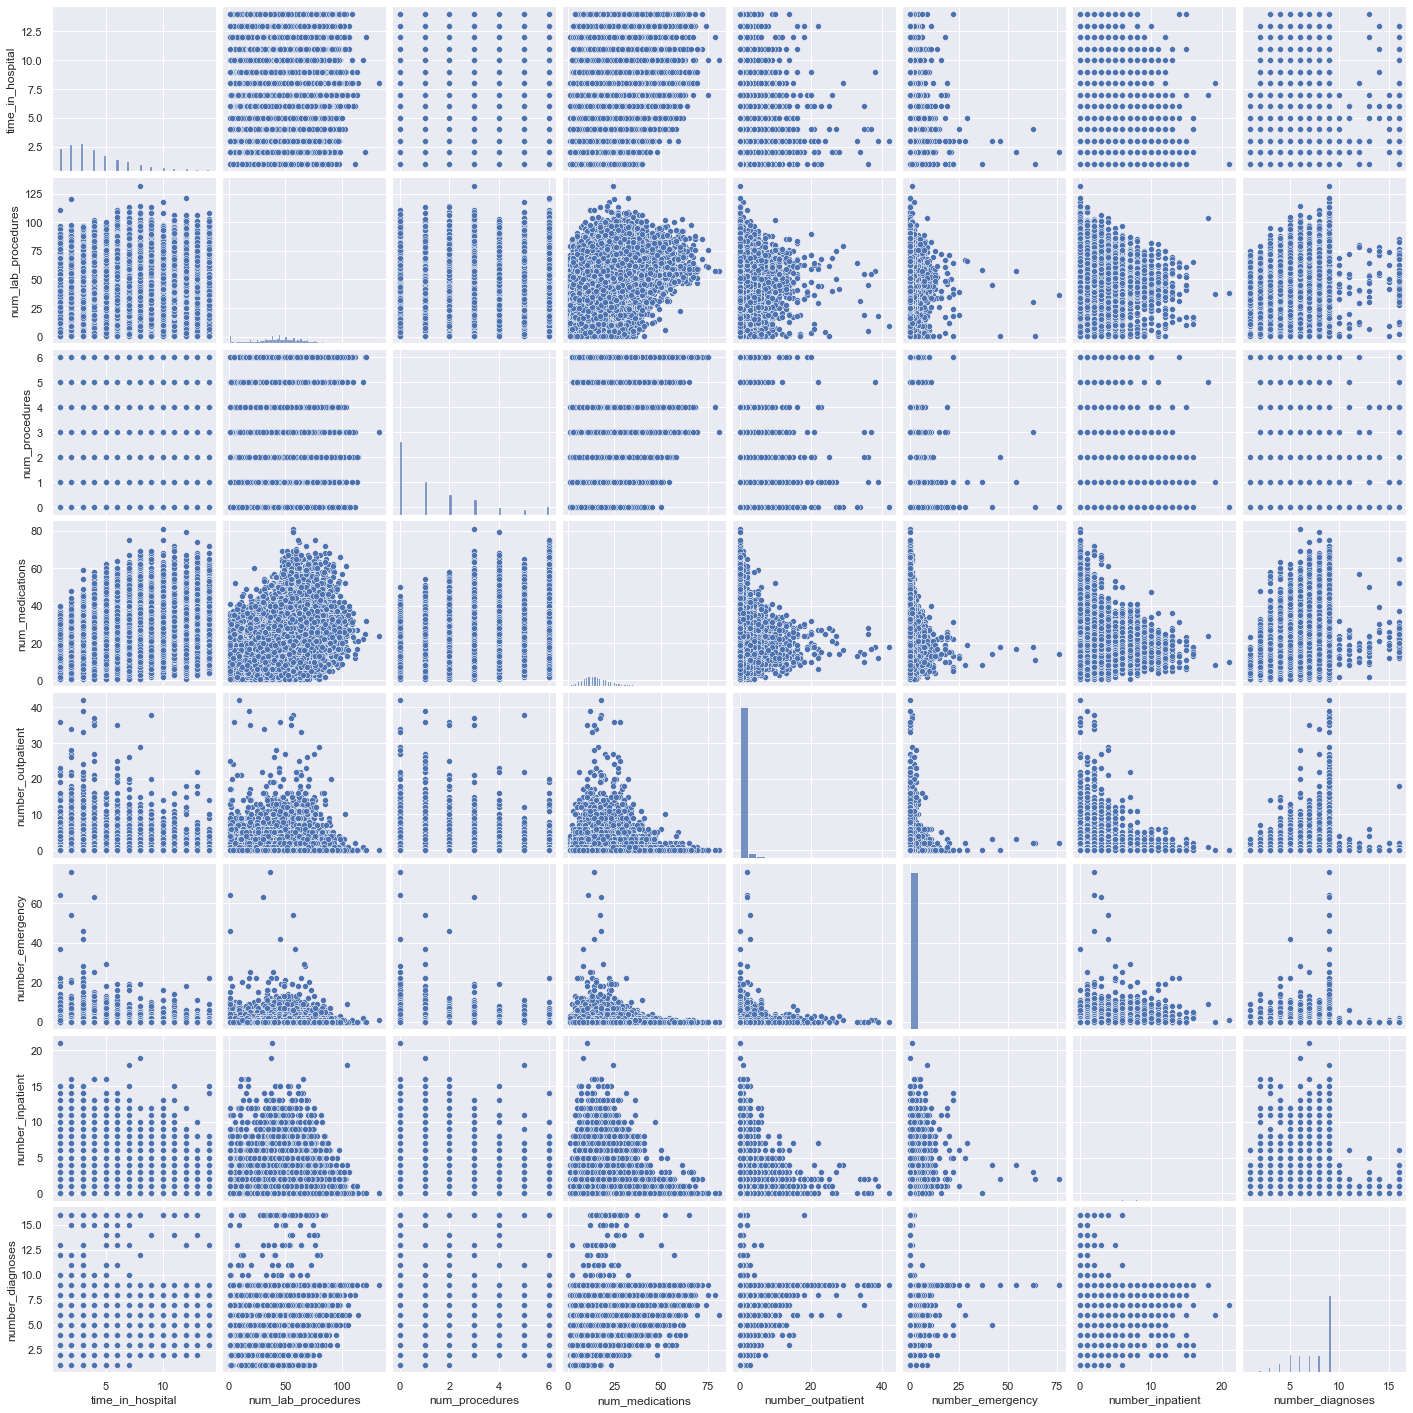

In [35]:
sns.pairplot(X_train_1[num_col])
plt.show()

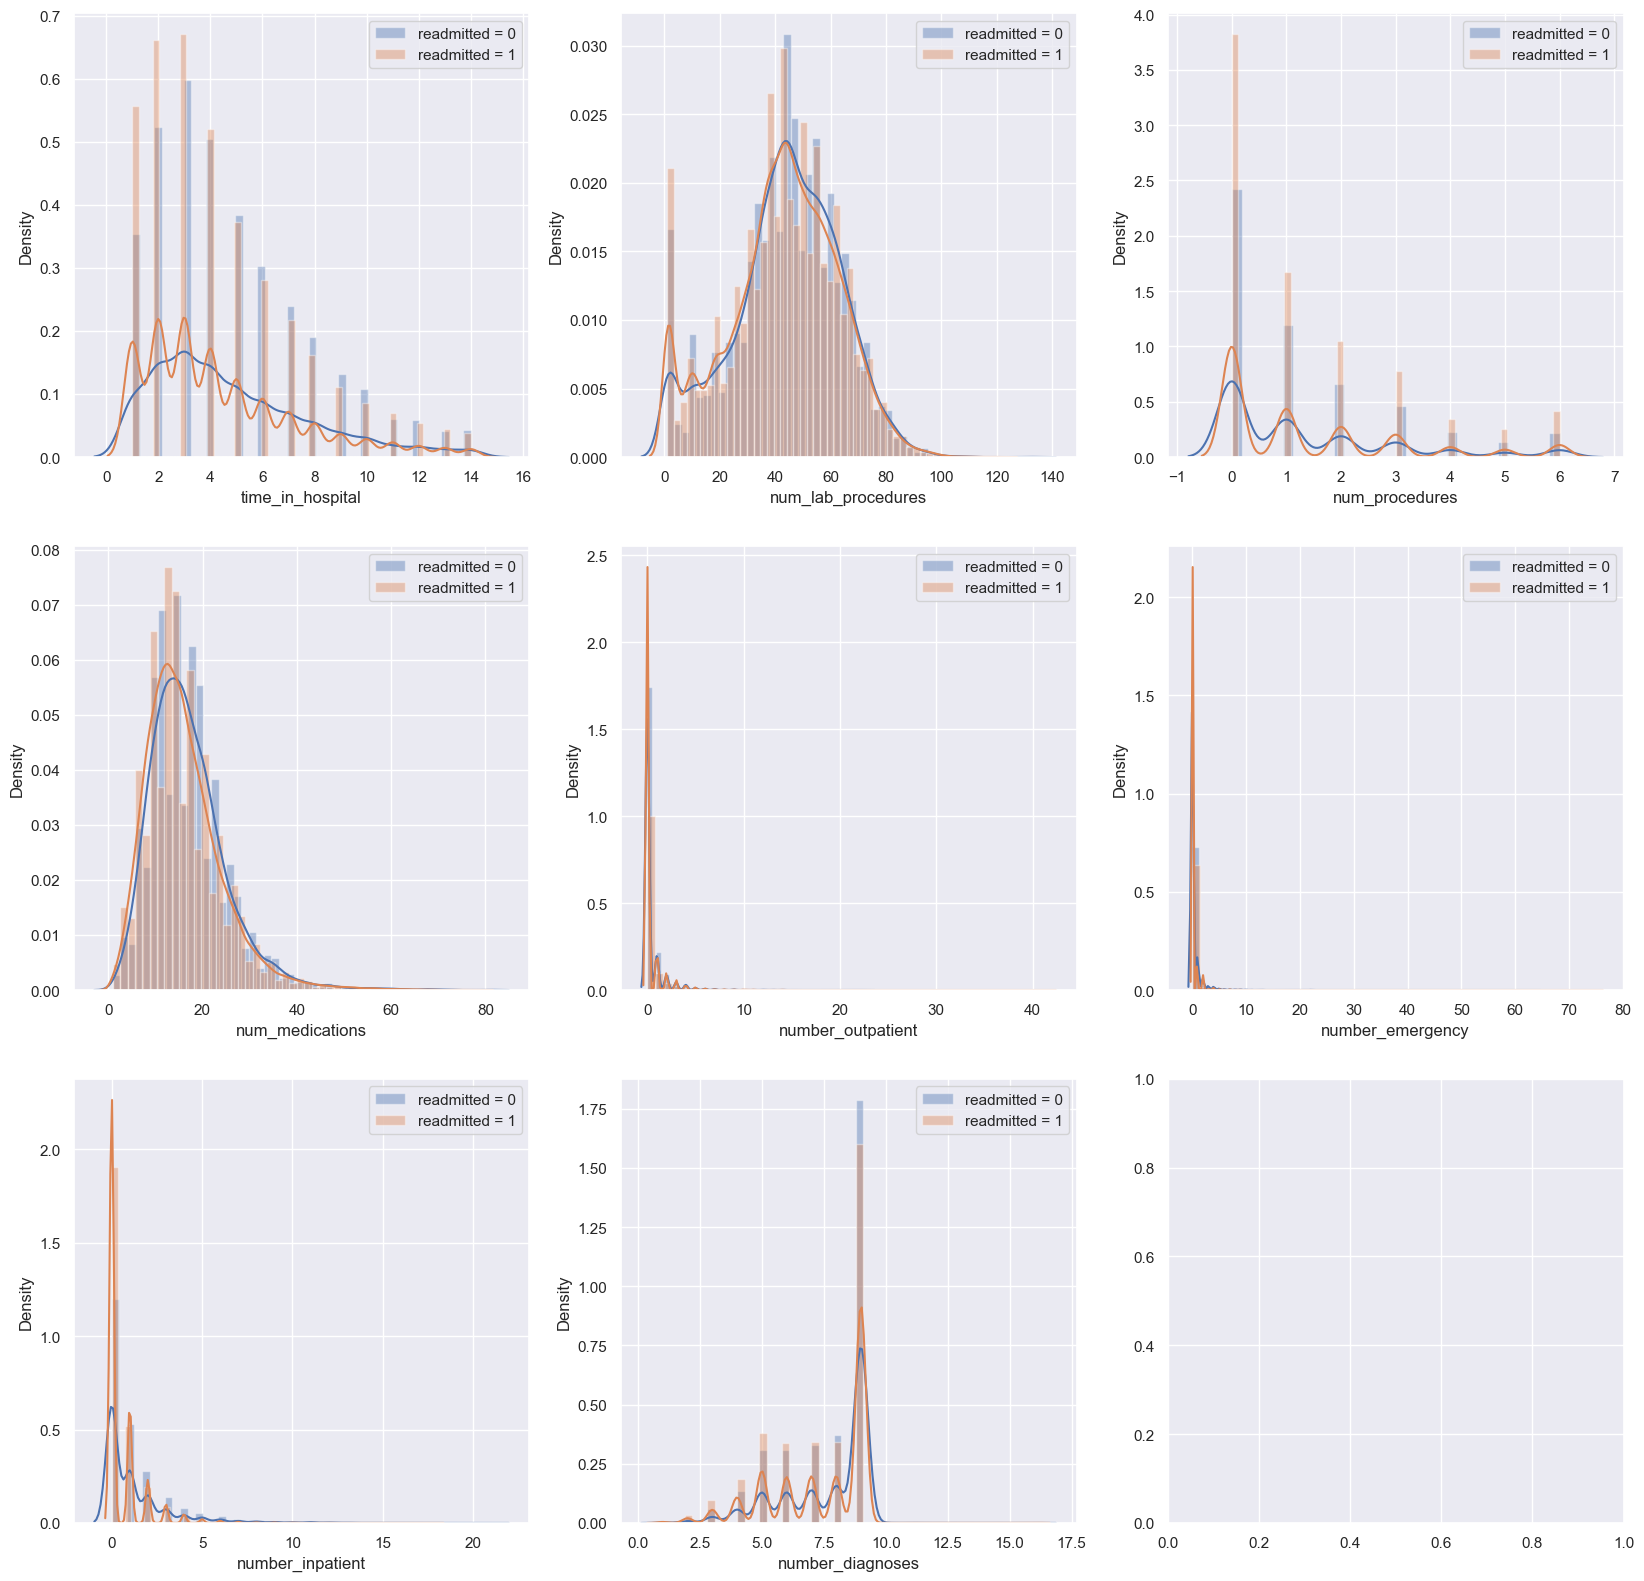

In [36]:
fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.distplot(X_train_1[num_col[i-1]][y_train_1==0],label = 'readmitted = 0')
    sns.distplot(X_train_1[num_col[i-1]][y_train_1==1],label = 'readmitted = 1')
    plt.legend()

In [37]:
# kruskall wallies test for distribution
from scipy import stats

greater = X_train_1[y_train_1==0]
less = X_train_1[y_train_1==1]

p_values=[]
stat = []
reject = []
for i in num_col:
    kw = stats.kruskal(greater[i],less[i])
    p_value = kw.pvalue
    p_values.append(p_value)
    statistic = kw.statistic
    stat.append(statistic)
    if p_value<0.01:
        reject.append('Yes')
    else:
        reject.append('No')

In [38]:
pd.DataFrame([stat,p_values,reject],columns = num_col,index = ['statistic','p_value','reject H0?'])

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
statistic,235.674905,30.727886,3.037553,165.576659,85.838389,341.149663,1560.579027,168.827252
p_value,0.0,0.0,0.081358,0.0,0.0,0.0,0.0,0.0
reject H0?,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes


# Feature engineering

In [39]:
X_train_1.shape,X_test_1.shape

((81412, 44), (20354, 44))

In [40]:
# concat train_test before feature engineering
train_test = pd.concat([X_train_1, X_test_1], axis=0)

In [41]:
def diag_code(data1, cols):
    for col in cols:
        data1.loc[(data1[col].str.contains("V")) | (data1[col].str.contains("E")), col] = 1000
        data1.loc[(data1[col]=='Unknown'), col] = 0
        data1[col] = data1[col].astype(np.float16)

    for col in cols:
        data1["diag"] = np.nan
        data1.loc[(data1[col]>=390) & (data1[col]<=459) | (data1[col]==785), "diag"] = "Circulatory"
        data1.loc[(data1[col]>=460) & (data1[col]<=519) | (data1[col]==786), "diag"] = "Respiratory"
        data1.loc[(data1[col]>=520) & (data1[col]<=579) | (data1[col]==787), "diag"] = "Digestive"
        data1.loc[(data1[col]>=250) & (data1[col]<251), "diag"] = "Diabetes"
        data1.loc[(data1[col]>=800) & (data1[col]<=999), "diag"] = "Injury"
        data1.loc[(data1[col]>=710) & (data1[col]<=739), "diag"] = "Muscoloskeletal"
        data1.loc[(data1[col]>=580) & (data1[col]<=629) | (data1[col] == 788), "diag"] = "Genitourinary"
        data1.loc[(data1[col]>=140) & (data1[col]<=239), "diag"] = "Neoplasms"
        

        data1["diag"] = data1["diag"].fillna("Other")
        data1[col] = data1["diag"]
        data1 = data1.drop("diag", axis=1)

    return data1

In [42]:
train_test = diag_code(train_test,["diag_1","diag_2","diag_3"])

In [43]:
train_test['diag_1'].value_counts()/train_test.shape[0]

Circulatory        0.299088
Other              0.178773
Respiratory        0.141727
Digestive          0.093106
Diabetes           0.086050
Injury             0.068530
Genitourinary      0.050282
Muscoloskeletal    0.048710
Neoplasms          0.033734
Name: diag_1, dtype: float64

In [44]:
train_test['diag_2'].value_counts()/train_test.shape[0]

Circulatory        0.313278
Other              0.264440
Diabetes           0.125720
Respiratory        0.107059
Genitourinary      0.082306
Digestive          0.040976
Neoplasms          0.025028
Injury             0.023859
Muscoloskeletal    0.017334
Name: diag_2, dtype: float64

In [45]:
train_test['diag_3'].value_counts()/train_test.shape[0]

Other              0.300867
Circulatory        0.297801
Diabetes           0.168593
Respiratory        0.072303
Genitourinary      0.065641
Digestive          0.038618
Injury             0.019122
Muscoloskeletal    0.018818
Neoplasms          0.018238
Name: diag_3, dtype: float64

In [46]:
train_test.admission_type_id.value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [47]:
train_test['admission_type_id'].replace(1,'Emergency',inplace = True)
train_test['admission_type_id'].replace(2,'Urgent',inplace = True)
train_test['admission_type_id'].replace(3,'Elective',inplace = True)
train_test['admission_type_id'].replace(4,'Newborn',inplace = True)
train_test['admission_type_id'].replace(5,'Not Available',inplace = True)
train_test['admission_type_id'].replace(6,'NULL',inplace = True)
train_test['admission_type_id'].replace(7,'Trauma Center',inplace = True)
train_test['admission_type_id'].replace(8,'Not Mapped',inplace = True)

In [48]:
train_test.admission_type_id.value_counts()/train_test.shape[0]

Emergency        0.530531
Elective         0.185416
Urgent           0.181593
NULL             0.051992
Not Available    0.047020
Not Mapped       0.003144
Trauma Center    0.000206
Newborn          0.000098
Name: admission_type_id, dtype: float64

In [49]:
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=asource
train_test['admission_source_id'].replace(1, 'Referral', inplace=True)
train_test['admission_source_id'].replace(2, 'Referral', inplace=True)
train_test['admission_source_id'].replace(3, 'Referral', inplace=True)
train_test['admission_source_id'].replace(4, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(5, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(6, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(7, 'Emergency room', inplace=True)
train_test['admission_source_id'].replace(8, 'Court/Law enforcement', inplace=True)
train_test['admission_source_id'].replace(9, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(10, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(11, 'delivery', inplace=True)
train_test['admission_source_id'].replace(13, 'delivery', inplace=True)
train_test['admission_source_id'].replace(14, 'delivery', inplace=True)
train_test['admission_source_id'].replace(17, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(20, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(22, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(25, 'Transfer', inplace=True)

In [50]:
train_test['admission_source_id'].value_counts()

Emergency room           57494
Referral                 30856
Unknown                   7067
Transfer                  6328
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Transfer'),
  Text(1, 0, 'Referral'),
  Text(2, 0, 'Emergency room'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Court/Law enforcement'),
  Text(5, 0, 'delivery')])

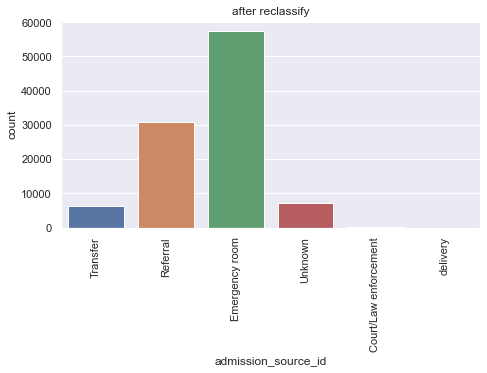

In [51]:
sns.countplot('admission_source_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [52]:
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=dispuniform
train_test['discharge_disposition_id'].replace(1, 'Routine', inplace = True)
train_test['discharge_disposition_id'].replace(2, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(3, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(4, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(5, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(6, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(7, 'AMA', inplace = True)
train_test['discharge_disposition_id'].replace(8, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(9, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(10, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(11, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(12, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(13, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(14, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(15, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(16, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(17, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(18, 'NULL', inplace = True)
train_test['discharge_disposition_id'].replace(19, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(20, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(22, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(23, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(24, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(25, 'Not mapped', inplace = True)
train_test['discharge_disposition_id'].replace(27, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(28, 'Transfer_Other', inplace = True)

In [53]:
train_test['discharge_disposition_id'].value_counts()

Routine                60234
Transfer_Other         19418
HHC                    13010
NULL                    3691
Transfer_stHospital     2149
Expired                 1652
Not mapped               989
AMA                      623
Name: discharge_disposition_id, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Routine'),
  Text(1, 0, 'Transfer_Other'),
  Text(2, 0, 'Transfer_stHospital'),
  Text(3, 0, 'HHC'),
  Text(4, 0, 'NULL'),
  Text(5, 0, 'Not mapped'),
  Text(6, 0, 'Expired'),
  Text(7, 0, 'AMA')])

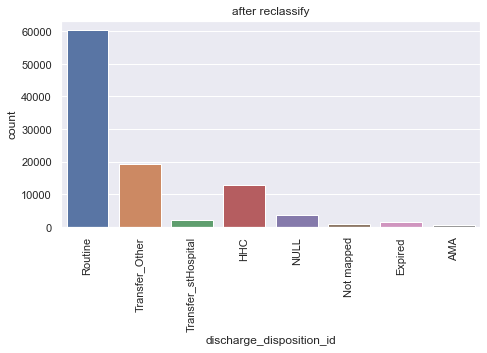

In [54]:
sns.countplot('discharge_disposition_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [55]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
               'metformin-rosiglitazone', 'metformin-pioglitazone', 'citoglipton']

In [56]:
def use_or_not(data, col):
    maps = {'No': 0, 'Up': 1, 'Steady': 1, 'Down': 1}
    data['use_or_not'+col] = data[col].map(maps)

In [57]:
for i in medications:
    use_or_not(train_test,i)

In [58]:
medications_use_ornot=['use_or_not' + i for i in medications]

In [59]:
## new variable: the number of doses the patient take 
train_test ['number_24medications'] = np.zeros(train_test.shape[0])
for i in medications_use_ornot:
    train_test ['number_24medications'] = train_test['number_24medications'] + train_test[i]

In [60]:
for i in medications_use_ornot:
    del train_test[i]

In [61]:
def change_or_not(data,col):
    maps = {'No': 0, 'Up': 1, 'Steady': 0, 'Down': 1}
    data['change_or_not'+col] = data[col].map(maps)

In [62]:
for i in medications:
    change_or_not(train_test,i)

In [63]:
medications_change_or_not=['change_or_not' + i for i in medications]

In [64]:
## new variable: the number of changes of doses the patient take 
train_test ['number_change_24medications'] = np.zeros(train_test.shape[0])
for i in medications_change_or_not:
    train_test ['number_change_24medications'] = train_test['number_change_24medications'] + train_test[i]

In [65]:
for i in medications_change_or_not:
    del train_test[i]

In [66]:
for i in medications:
    del train_test[i]

In [67]:
num_col = train_test.columns[train_test.dtypes!=object]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object') 
 total number of numerical columns: 10


In [68]:
obj_col = train_test.columns[train_test.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 13


In [69]:
X_train_2 = train_test.iloc[:X_train_1.shape[0],:]
X_test_2 = train_test.iloc[X_train_1.shape[0]:,:]
X_train_2.shape, X_train_1.shape, X_test_2.shape, X_test_1.shape

((81412, 23), (81412, 44), (20354, 23), (20354, 44))

In [70]:
for i in obj_col:
    print(X_train_2[i].value_counts())
    print('-'*25,'\n')

Caucasian          62785
AfricanAmerican    15306
Hispanic            1621
Other               1187
Asian                513
Name: race, dtype: int64
------------------------- 

Female             43848
Male               37561
Unknown/Invalid        3
Name: gender, dtype: int64
------------------------- 

[70-80)     20888
[60-70)     18036
[50-60)     13844
[80-90)     13735
[40-50)      7670
[30-40)      3010
[90-100)     2212
[20-30)      1344
[10-20)       544
[0-10)        129
Name: age, dtype: int64
------------------------- 

Emergency        43225
Elective         15086
Urgent           14824
NULL              4174
Not Available     3826
Not Mapped         253
Trauma Center       15
Newborn              9
Name: admission_type_id, dtype: int64
------------------------- 

Routine                48164
Transfer_Other         15598
HHC                    10393
NULL                    2978
Transfer_stHospital     1682
Expired                 1316
Not mapped               787
AMA    

In [71]:
X_train_2['gender'].value_counts()

Female             43848
Male               37561
Unknown/Invalid        3
Name: gender, dtype: int64

In [72]:
y_train_1 = y_train_1.drop(X_train_2[X_train_2['gender']=='Unknown/Invalid'].index)
X_train_2 = X_train_2.drop(X_train_2[X_train_2['gender']=='Unknown/Invalid'].index)

#### Transformation on numerical variables

In [73]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20 , contamination = 0.1)
clf.fit_predict(X_train_2[num_col])

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
X_train_2[num_col].skew()

time_in_hospital                1.127783
num_lab_procedures             -0.240424
num_procedures                  1.312903
num_medications                 1.337335
number_outpatient               8.836167
number_emergency               24.197236
number_inpatient                3.657859
number_diagnoses               -0.870623
number_24medications            0.680149
number_change_24medications     1.435999
dtype: float64

In [75]:
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object')

In [76]:
right_skewed = num_col[X_train_2[num_col].skew()>0]
right_skewed

Index(['time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_24medications', 'number_change_24medications'],
      dtype='object')

In [77]:
def boxcox(column, data):
    if data[column].min()==0:
        data[column]=data[column]+1
    data['bc_'+column]=stats.boxcox(data[column])[0]

In [78]:
for i in right_skewed:
    boxcox(i, X_train_2)

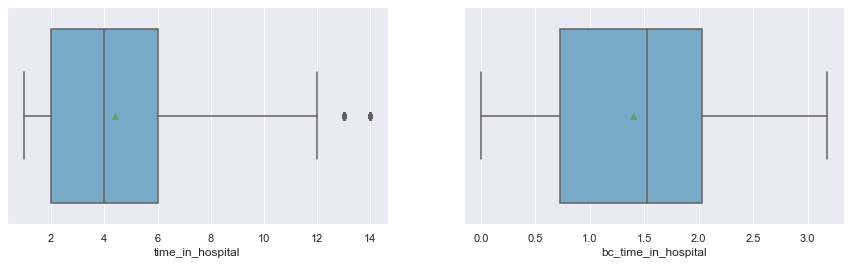

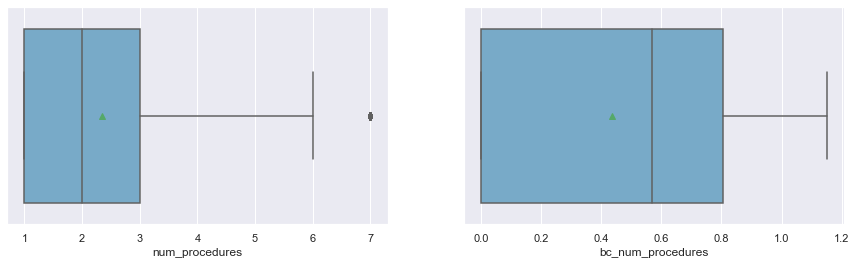

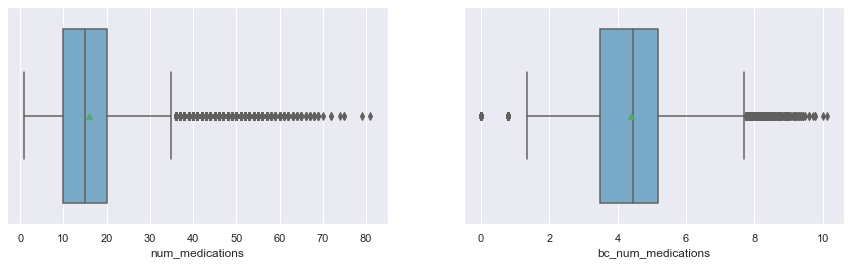

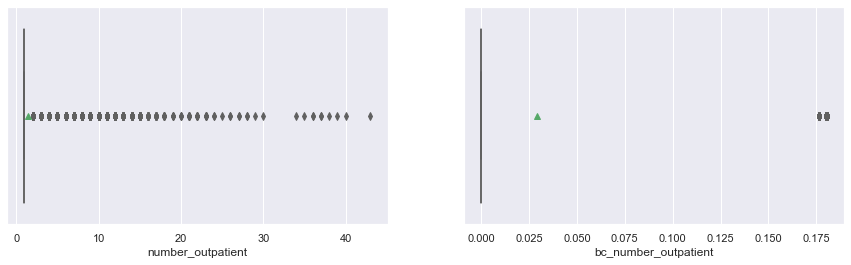

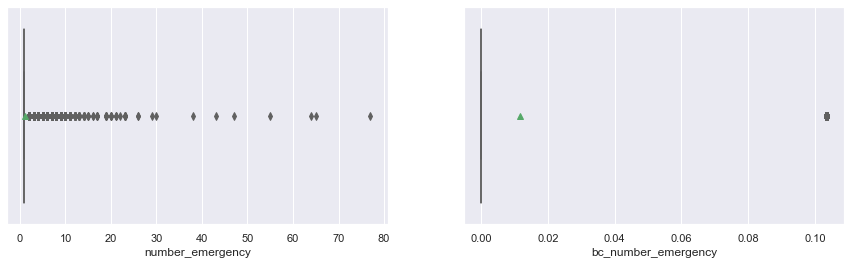

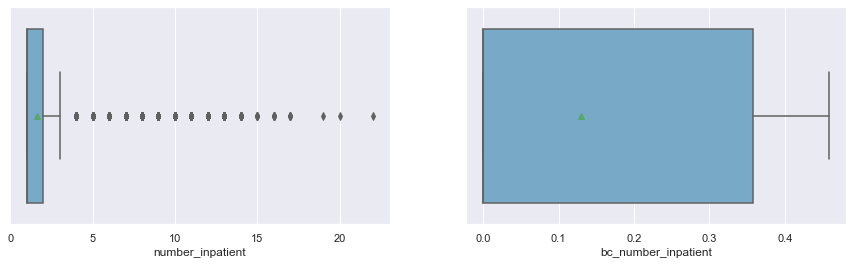

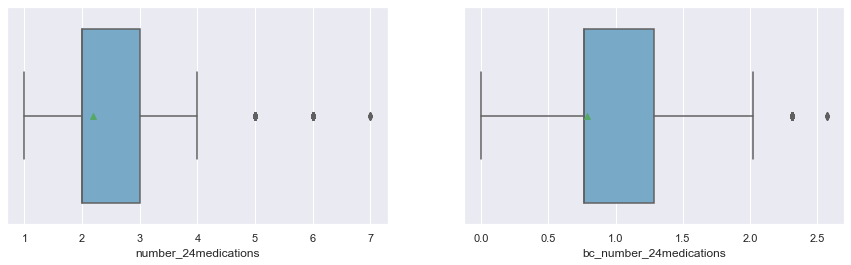

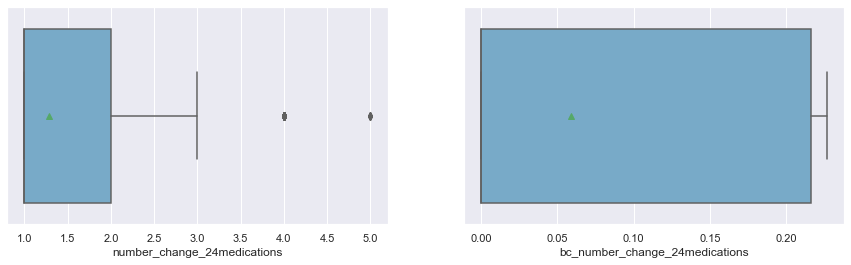

In [79]:
for i in right_skewed:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
  
    sns.boxplot(i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[0])
     
    sns.boxplot('bc_'+i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[1])

In [80]:
len(X_train_2[X_train_2['bc_number_outpatient']>0.02])

13380

In [81]:
X_train_3 = X_train_2.drop(X_train_2[X_train_2['bc_number_outpatient']>0.02].index)

In [82]:
X_train_3.shape

(68029, 31)

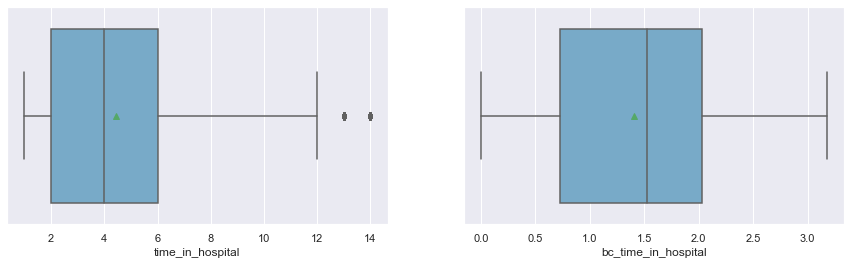

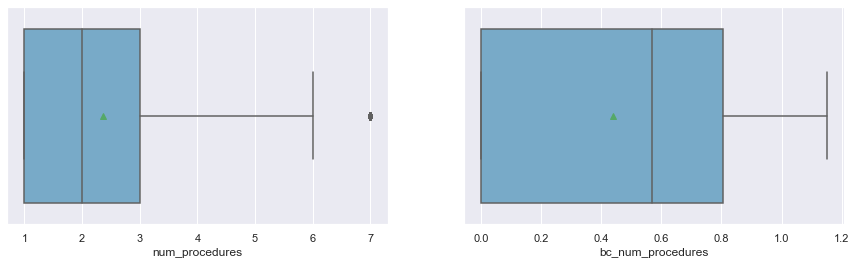

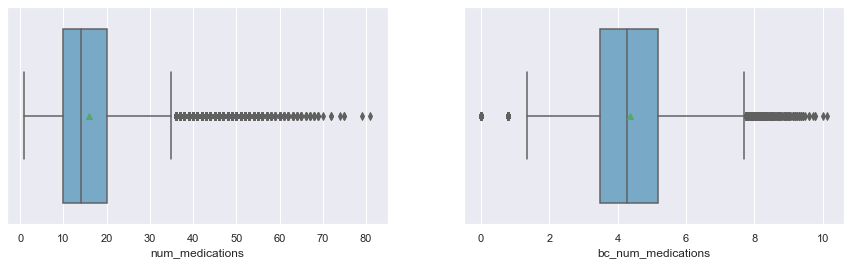

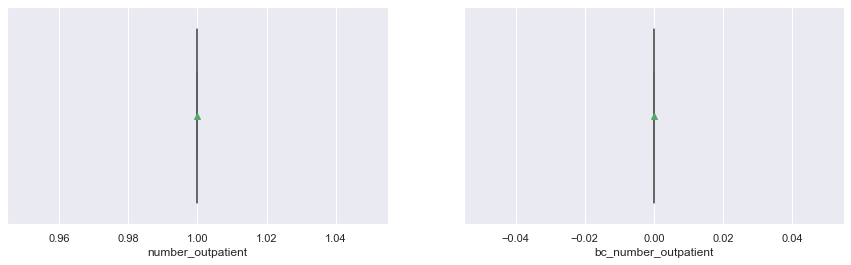

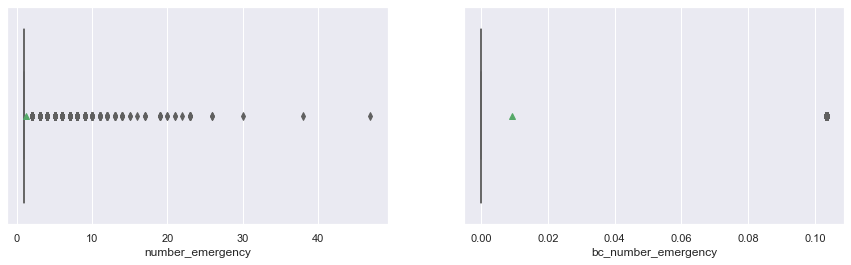

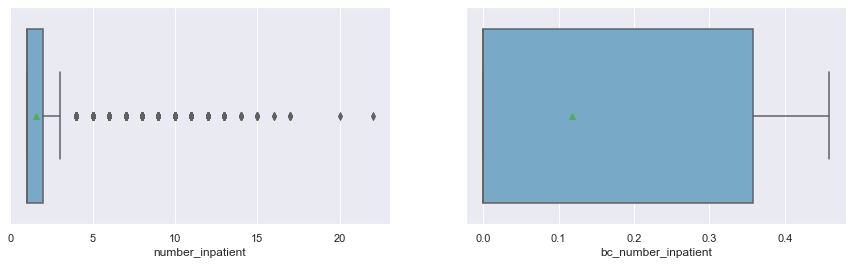

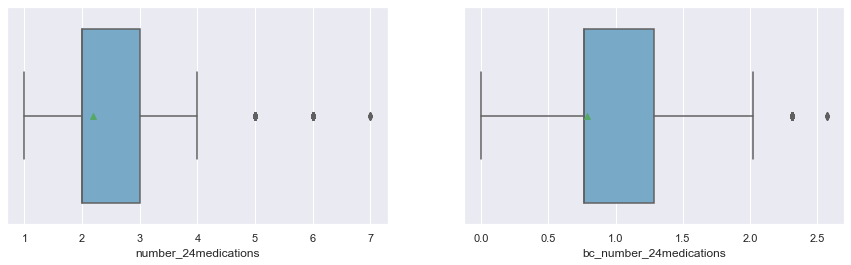

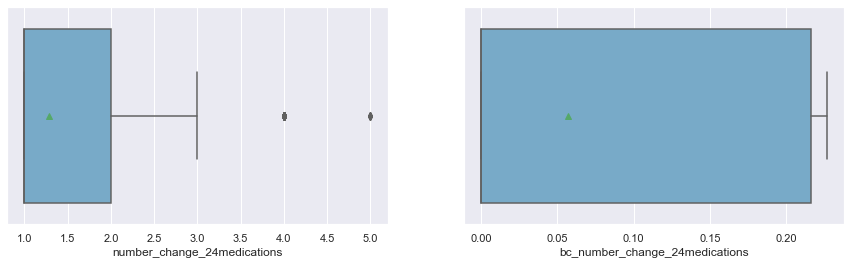

In [83]:
for i in right_skewed:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
  
    sns.boxplot(i, data=X_train_3, palette='Blues', showmeans=True,ax=axes[0])
     
    sns.boxplot('bc_'+i, data=X_train_3, palette='Blues', showmeans=True,ax=axes[1])

In [84]:
len(X_train_2[X_train_2['bc_number_emergency']>0.1])

9181

In [85]:
X_train_3 = X_train_3.drop(X_train_3[X_train_3['bc_number_emergency']>0.1].index)

In [86]:
X_train_3['bc_number_outpatient'].value_counts()

0.0    61986
Name: bc_number_outpatient, dtype: int64

In [87]:
X_train_3['bc_number_emergency'].value_counts()

0.0    61986
Name: bc_number_emergency, dtype: int64

In [88]:
np.quantile(X_train_2['bc_num_medications'],[0.25,0.75])

array([3.48712203, 5.19085103])

In [89]:
quantile25 = np.quantile(X_train_2['bc_num_medications'],0.25)
quantile75 = np.quantile(X_train_2['bc_num_medications'],0.75)

In [90]:
len(X_train_2[X_train_2['bc_num_medications']<quantile25])

16355

In [91]:
len(X_train_2[X_train_2['bc_num_medications']>quantile75])

19152

In [92]:
y_train_1 = y_train_1.drop(X_train_2[X_train_2['bc_num_medications']<quantile25].index)
X_train_2 = X_train_2.drop(X_train_2[X_train_2['bc_num_medications']<quantile25].index)

In [93]:
y_train_1 = y_train_1.drop(X_train_2[X_train_2['bc_num_medications']>quantile75].index)
X_train_2 = X_train_2.drop(X_train_2[X_train_2['bc_num_medications']>quantile75].index)

In [94]:
y_train_1.shape

(45902,)

In [95]:
for i in right_skewed:
    boxcox(i, X_test_2)

In [96]:
for i in right_skewed:
    del X_train_2[i]
    del X_test_2[i]

In [97]:
del X_train_2['bc_number_emergency']
del X_test_2['bc_number_emergency']
del X_train_2['bc_number_outpatient']
del X_test_2['bc_number_outpatient']

In [98]:
for i in X_train_2.columns:
    if len(X_train_2[i].unique())==1:
        print(i)
        del X_train_2[i]
        del X_test_2[i]

In [99]:
train_test_2 = pd.concat([X_train_2,X_test_2], axis=0)

In [100]:
train_test_2['age'].values

array(['[40-50)', '[50-60)', '[40-50)', ..., '[60-70)', '[70-80)',
       '[60-70)'], dtype=object)

In [101]:
from sklearn import preprocessing
oe = preprocessing.OrdinalEncoder()
oe.fit(train_test_2['age'].values.reshape(-1, 1))
train_test_2['age_ordinal']=oe.transform(train_test_2['age'].values.reshape(-1, 1)).copy()

In [102]:
del train_test_2['age']

In [103]:
train_test_2.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'num_lab_procedures', 'diag_1', 'diag_2',
       'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'bc_time_in_hospital', 'bc_num_procedures',
       'bc_num_medications', 'bc_number_inpatient', 'bc_number_24medications',
       'bc_number_change_24medications', 'age_ordinal'],
      dtype='object')

In [104]:
train_test_2

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,diag_1,diag_2,diag_3,number_diagnoses,...,A1Cresult,change,diabetesMed,bc_time_in_hospital,bc_num_procedures,bc_num_medications,bc_number_inpatient,bc_number_24medications,bc_number_change_24medications,age_ordinal
24990,AfricanAmerican,Female,Emergency,Routine,Transfer,46,Injury,Other,Diabetes,5,...,>7,No,Yes,2.228491,0.000000,4.905422,0.000000,0.763310,0.000000,4.0
67555,Caucasian,Male,Elective,Routine,Referral,60,Other,Other,Diabetes,6,...,None,Ch,Yes,2.705037,0.567603,4.264329,0.000000,0.763310,0.216257,5.0
89978,Caucasian,Male,Elective,Routine,Referral,39,Other,Diabetes,Circulatory,6,...,Norm,No,No,0.726959,0.000000,4.264329,0.000000,0.000000,0.000000,4.0
90748,AfricanAmerican,Female,Urgent,Transfer_Other,Emergency room,80,Digestive,Circulatory,Other,9,...,None,Ch,Yes,2.029598,0.000000,5.050622,0.417329,0.763310,0.216257,6.0
54643,AfricanAmerican,Female,Elective,Routine,Referral,66,Other,Other,Diabetes,9,...,None,Ch,Yes,0.000000,1.034128,4.264329,0.000000,0.763310,0.216257,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58668,Caucasian,Male,Emergency,AMA,Emergency room,57,Respiratory,Respiratory,Circulatory,7,...,None,No,Yes,0.724642,0.000000,3.064635,0.000000,0.760422,0.000000,7.0
24866,Caucasian,Male,Emergency,Routine,Emergency room,44,Respiratory,Respiratory,Diabetes,7,...,Norm,No,Yes,2.012522,0.000000,5.452116,0.000000,0.760422,0.000000,4.0
28929,Caucasian,Male,Not Available,Routine,Unknown,18,Respiratory,Other,Diabetes,7,...,None,No,No,0.724642,0.000000,3.546950,0.000000,0.000000,0.000000,6.0
43837,AfricanAmerican,Female,Emergency,HHC,Transfer,44,Injury,Injury,Circulatory,9,...,None,Ch,Yes,2.380591,0.801174,7.183484,0.000000,2.004142,0.220888,7.0


In [105]:
train_test_new = pd.get_dummies(train_test_2)

In [106]:
X_train_3 = train_test_new.iloc[:X_train_2.shape[0],:]
X_test_3 = train_test_new.iloc[X_train_2.shape[0]:,:]
X_train_2.shape, X_train_3.shape, X_test_2.shape, X_test_3.shape

((45902, 21), (45902, 77), (20354, 21), (20354, 77))

### Handling class imbalance

In [107]:
X_train_3

,num_lab_procedures,number_diagnoses,bc_time_in_hospital,bc_num_procedures,bc_num_medications,bc_number_inpatient,bc_number_24medications,bc_number_change_24medications,age_ordinal,race_AfricanAmerican,...,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
24990,46,5,2.228491,0.000000,4.905422,0.000000,0.763310,0.000000,4.0,1,...,1,0,1,0,0,0,0,1,0,1
67555,60,6,2.705037,0.567603,4.264329,0.000000,0.763310,0.216257,5.0,0,...,1,0,0,0,1,0,1,0,0,1
89978,39,6,0.726959,0.000000,4.264329,0.000000,0.000000,0.000000,4.0,0,...,1,0,0,0,0,1,0,1,1,0
90748,80,9,2.029598,0.000000,5.050622,0.417329,0.763310,0.216257,6.0,1,...,1,0,0,0,1,0,1,0,0,1
54643,66,9,0.000000,1.034128,4.264329,0.000000,0.763310,0.216257,1.0,1,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65260,79,9,0.726959,0.000000,4.085466,0.000000,0.763310,0.000000,6.0,0,...,1,0,1,0,0,0,0,1,0,1
44777,30,7,0.726959,0.942829,5.190851,0.000000,0.763310,0.000000,7.0,0,...,1,0,0,0,1,0,0,1,0,1
100437,57,6,1.525975,0.805664,3.487122,0.000000,0.000000,0.000000,9.0,0,...,0,1,0,0,1,0,0,1,1,0
61510,35,6,2.404191,0.805664,4.085466,0.000000,1.281796,0.000000,8.0,1,...,1,0,0,0,1,0,1,0,0,1


In [108]:
cat_index = []
for i in range(len(X_train_3.columns)):
    if X_train_3.iloc[:,i].dtype=='uint8':
        cat_index.append(i)
len(cat_index)

68

In [109]:
from imblearn.over_sampling import SMOTENC
smnc = SMOTENC(categorical_features = cat_index,random_state=41,sampling_strategy = 'minority')

SMOTE_X, SMOTE_y = smnc.fit_resample(X_train_3, y_train_1)

In [110]:
SMOTE_X.shape,SMOTE_y.shape

((81408, 77), (81408,))

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(SMOTE_X)

# normalize
X_train_4  = scaler.transform(SMOTE_X)
X_test_4 = scaler.transform(X_test_3)

In [112]:
X_train_4.shape,X_test_4.shape

((81408, 77), (20354, 77))

In [113]:
### normalize+remove low-variance features
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.98 * (1 - .98)))
sel.fit(SMOTE_X)
X_train_5 = sel.transform(SMOTE_X)
X_test_5 = sel.transform(X_test_3)

In [114]:
X_train_5.shape,X_test_5.shape

((81408, 54), (20354, 54))

In [115]:
from sklearn import feature_selection 
mi = feature_selection.mutual_info_classif(X_train_4, SMOTE_y, discrete_features='auto', 
                                              n_neighbors=5, copy=True, 
                                              random_state=41)

In [116]:
mi = pd.DataFrame(mi,columns = ['mutual info'])
mi['variable'] = X_train_3.columns

In [117]:
mi = mi.sort_values(by = 'mutual info',ascending = False)

In [118]:
mi

,mutual info,variable
4,0.370062,bc_num_medications
2,0.301312,bc_time_in_hospital
5,0.254035,bc_number_inpatient
3,0.222332,bc_num_procedures
6,0.166067,bc_number_24medications
...,...,...
66,0.000000,max_glu_serum_>300
20,0.000000,admission_type_id_Not Available
30,0.000000,discharge_disposition_id_Transfer_Other
22,0.000000,admission_type_id_Trauma Center


In [155]:
len(mi[mi['mutual info']>0.015])

12

In [156]:
select_fea = mi[mi['mutual info']>0.015]['variable']

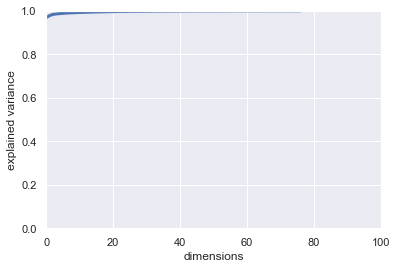

In [121]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(SMOTE_X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Plot the explained variance vs number of dimensions
plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [122]:
# pca after normalize
pca = PCA(n_components=0.99).fit(SMOTE_X)

X_train_pca = pca.transform(SMOTE_X)
X_test_pca = pca.transform(X_test_3)

In [123]:
X_train_pca.shape,X_test_pca.shape

((81408, 8), (20354, 8))

In [124]:
X_train_4 = pd.DataFrame(X_train_4,columns = X_train_3.columns)
X_test_4 = pd.DataFrame(X_test_4, columns = X_train_3.columns)

In [157]:
X_train_4[select_fea]

,bc_num_medications,bc_time_in_hospital,bc_number_inpatient,bc_num_procedures,bc_number_24medications,bc_number_change_24medications,age_ordinal,A1Cresult_None,diag_1_Respiratory,diag_3_Diabetes,admission_type_id_Urgent,diag_2_Respiratory
0,0.832468,0.701591,0.000000,0.000000,0.296976,0.000000,0.444444,0.0,0.0,1.0,0.0,0.0
1,0.456180,0.851621,0.000000,0.493258,0.296976,0.953624,0.555556,1.0,0.0,1.0,0.0,0.0
2,0.456180,0.228867,0.000000,0.000000,0.000000,0.000000,0.444444,0.0,0.0,0.0,0.0,0.0
3,0.917693,0.638974,0.909611,0.000000,0.296976,0.953624,0.666667,1.0,0.0,0.0,1.0,0.0
4,0.456180,0.000000,0.000000,0.898677,0.296976,0.953624,0.111111,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81403,0.707392,0.590651,0.000000,0.467416,0.296976,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0
81404,0.311824,0.000000,0.165014,0.000000,0.296976,0.000000,0.685921,1.0,0.0,0.0,0.0,0.0
81405,0.822635,0.511167,0.000000,0.544729,0.296976,0.106050,0.777778,1.0,0.0,0.0,0.0,0.0
81406,0.637263,0.330897,0.463509,0.000000,0.296976,0.000000,0.888889,1.0,0.0,0.0,0.0,0.0


# Modelling

In [192]:
def clf(classifier,X_train, y_train, X_test, y_test):
    clf = classifier.fit(X_train, y_train)
    clf_train_acc = clf.score(X_train, y_train).round(4)
    clf_test_acc = clf.score(X_test, y_test).round(4)
    y_pred = clf.predict(X_test)
    clf_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    clf_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    clf_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    clf_test_bal_acc = metrics.balanced_accuracy_score(y_test, y_pred).round(4)
    clf_test_auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]).round(4)
    report = metrics.confusion_matrix(y_test, y_pred)
    scores = [clf_test_acc,clf_test_precision,clf_test_recall,clf_test_F1,clf_test_bal_acc,clf_test_auc]
    return report,scores

### Logit regression

In [197]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.3, l1_ratio=0.7, penalty='elasticnet', random_state=41,
                   solver='saga')
lr_report, lr_scores = clf(lr, X_train_4[select_fea],SMOTE_y,X_test_4[select_fea],y_test_1)
print('test scores:',lr_scores)
print('confusion matrix:\n',lr_report)

test scores: [0.5978, 0.9045, 0.6119, 0.73, 0.5489, 0.5764]
confusion matrix:
 [[ 1104  1168]
 [ 7018 11064]]


### Random forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,max_depth=1,random_state = 41)
rf_report, rf_scores = clf(rf, X_train_4[select_fea],SMOTE_y,X_test_4[select_fea],y_test_1)
print('test scores:',rf_scores)
print('confusion matrix:\n',rf_report)

test scores: [0.6971, 0.9115, 0.73, 0.8107, 0.5828, 0.6039]
confusion matrix:
 [[  990  1282]
 [ 4883 13199]]


# Evaluation visualiazation

In [204]:
# precision
precision = [lr_scores[1],rf_scores[1]]
precision = pd.DataFrame(precision, index = ['logistic regression','random forest'], columns = ['precision'])
precision

,precision
logistic regression,0.9045
random forest,0.9115


<AxesSubplot:ylabel='precision'>

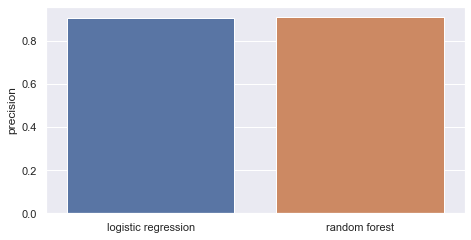

In [221]:
sns.barplot(x = precision.index, y = 'precision',data = precision)

In [205]:
# recall
recall = [lr_scores[2],rf_scores[2]]
recall = pd.DataFrame(recall, index = ['logistic regression','random forest'], columns = ['recall'])
recall

,recall
logistic regression,0.6119
random forest,0.7300


<AxesSubplot:ylabel='recall'>

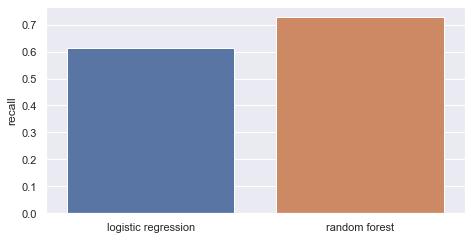

In [222]:
sns.barplot(x = recall.index, y = 'recall',data = recall)

In [206]:
# F1
F1 = [lr_scores[3],rf_scores[3]]
F1 = pd.DataFrame(F1, index = ['logistic regression','random forest'], columns = ['F1'])
F1

,F1
logistic regression,0.7300
random forest,0.8107


<AxesSubplot:ylabel='F1'>

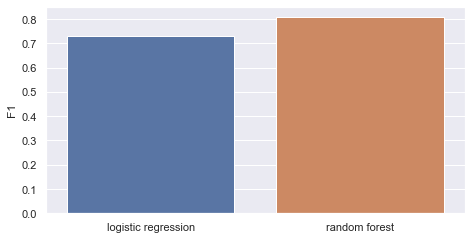

In [223]:
sns.barplot(x = F1.index, y = 'F1',data = F1)

In [207]:
# balanced accuracy
bal_acc = [lr_scores[4],rf_scores[4]]
bal_acc = pd.DataFrame(bal_acc, index = ['logistic regression','random forest'], columns = ['balanced accuracy'])
bal_acc

,balanced accuracy
logistic regression,0.5489
random forest,0.5828


<AxesSubplot:ylabel='balanced accuracy'>

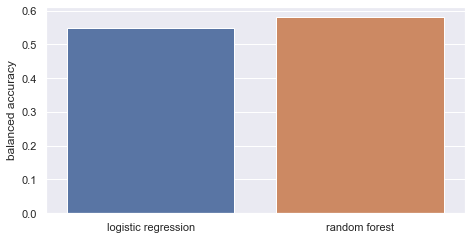

In [225]:
sns.barplot(x = bal_acc.index, y = 'balanced accuracy',data = bal_acc)

In [209]:
# auc
auc = [lr_scores[5],rf_scores[5]]
auc = pd.DataFrame(auc, index = ['logistic regression','random forest'], columns = ['AUC'])
auc

,AUC
logistic regression,0.5764
random forest,0.6039


<AxesSubplot:ylabel='AUC'>

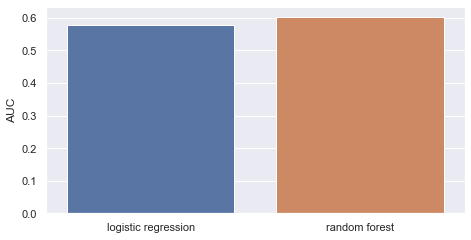

In [226]:
sns.barplot(x = auc.index, y = 'AUC',data = auc)

In [181]:
X_train_4[select_fea].to_csv('training set.csv',index=False)
X_test_4[select_fea].to_csv('testing set.csv',index=False)

In [182]:
SMOTE_y.to_csv('training y.csv',index=False)
y_test_1.to_csv('testing y.csv',index=False)